In [44]:
print('Hello')

Hello


In [45]:
import pandas as pd
import seaborn as sns

In [46]:
df = pd.read_csv('data/sulatto_fulldata2025_version2.csv', delimiter=";", index_col=None)

C:\Users\kalle\AppData\Local\Temp\ipykernel_23664\3465785326.py:1: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/sulatto_fulldata2025_version2.csv', delimiter=";", index_col=None)


In [47]:
df

,Material Type,End time,Route,Weight,Length,Thickness,Width,Grade,Quality Status,Seg No,...,CCM.MD. Level std_dev east Value,CCM.MD. Mold width Value,CCM.MIX. Concentration factor Value,CCM.STR. Speed - Mold avg Value,CCM.STR. Throughput Value,CCM.SLAB. Slab counter heat Value,CCM.SLAB. Slab counter sequence Value,HeatNo_in_Cast,SlabNo_in_Heat,CastNo
0,slab,2023-02-06 01:05:11,Route 1,25783,"10,63","202,000",1539,720-1,ERROR,1,...,"12,50",1539.0,"0,000","0,50","1,18",1.0,1.0,2821,1,100.0
1,slab,2023-02-06 01:05:11,Route 1,25783,"10,63","202,000",1539,720-1,ERROR,2,...,"12,50",1539.0,"0,000","0,54","1,28",1.0,1.0,2821,1,100.0
2,slab,2023-02-06 01:05:11,Route 1,25783,"10,63","202,000",1539,720-1,ERROR,3,...,"12,50",1539.0,"0,000","0,56","1,33",1.0,1.0,2821,1,100.0
3,slab,2023-02-06 01:05:11,Route 1,25783,"10,63","202,000",1539,720-1,ERROR,4,...,"12,50",1539.0,"0,000","0,57","1,37",1.0,1.0,2821,1,100.0
4,slab,2023-02-06 01:05:11,Route 1,25783,"10,63","202,000",1539,720-1,ERROR,5,...,"12,50",1539.0,"0,000","0,59","1,41",1.0,1.0,2821,1,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677810,slab,2023-04-30 16:03:14,Route 1,13145,"6,51","202,000",1284,720-1,ERROR,62,...,"5,50",1284.0,"0,000","0,30","0,64",8.0,53.0,1050,8,NaN
677811,slab,2023-04-30 16:03:14,Route 1,13145,"6,51","202,000",1284,720-1,ERROR,63,...,"5,50",1284.0,"0,000","0,27","0,56",8.0,53.0,1050,8,NaN
677812,slab,2023-04-30 16:03:14,Route 1,13145,"6,51","202,000",1284,720-1,ERROR,64,...,"5,50",1284.0,"0,000","0,26","0,51",8.0,53.0,1050,8,NaN
677813,slab,2023-04-30 16:03:14,Route 1,13145,"6,51","202,000",1284,720-1,ERROR,65,...,"5,50",1284.0,"0,000","0,24","0,45",8.0,53.0,1050,8,NaN


In [48]:
df['Route'].nunique()
# This can be dropped

1

In [49]:
df['CCM.MIX. Concentration factor Value'].nunique()

1001

In [50]:
df['Weight'].nunique()

1079

In [51]:
df['Thickness'].nunique()
# Can be dropped

1

In [52]:
df['Length'].nunique()

268

In [53]:
df['Width'].nunique()

37

We could maybe use Thickness * Length * Width to calculate Volume of slabs, to reduce the amount of columns.

In [54]:
df['Quality Status'].nunique()

3

In [55]:
df['CCM.TD. Heat counter Value'].value_counts()

CCM.TD. Heat counter Value
1.0     97364
2.0     94453
3.0     94178
4.0     89181
5.0     83450
6.0     78774
7.0     72487
8.0     64651
9.0      2094
10.0      667
Name: count, dtype: int64

In [56]:
df['CCM.TD. TD internals type Value'].nunique()
# We can drop this

1

In [57]:
df['CCM.TD. Slag powder Value'].value_counts()
# Probably we don't need this

CCM.TD. Slag powder Value
Yes    677299
No        516
Name: count, dtype: int64

In [58]:
df['CCM.TD. Stopper Type Value'].value_counts()

CCM.TD. Stopper Type Value
T1    492838
T2    182690
Name: count, dtype: int64

In [59]:
df['CCM.TD. Steel weight in tundish Value'].nunique()

240

In [60]:
df['CCM.TD. Tundish inflow Value'].nunique()

1533

In [61]:
df['CCM.TD. Stopper Last Position Value'].nunique()

534

In [62]:
df['CCM.TD. Stopper position min Value'].nunique()

548

In [63]:
df['CCM.TD. Stopper pos chg max segment Value'].nunique()

137

In [64]:
df['CCM.TD. Stopper position chg 10 s Value'].nunique()

103

In [65]:
df['CCM.SEN. SEN Type Value'].value_counts()


CCM.SEN. SEN Type Value
Product 1    471397
Product 2    200963
Name: count, dtype: int64

In [66]:
data1 = df.corr(numeric_only=True)

<Axes: >

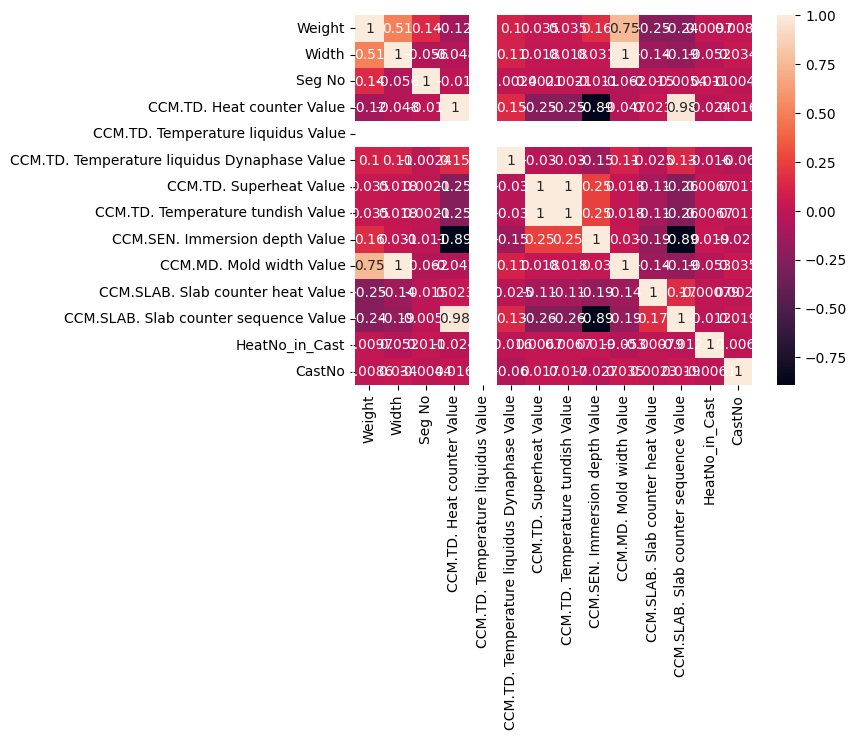

In [67]:
sns.heatmap(data1, annot=True)